In [2]:
! cp -r /content/drive/My\ Drive/machine_learning /content

In [1]:
import os
os.chdir("/content/machine_learning")

In [2]:
import bbmm_models
import cnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset
import torch
import torch.nn as nn
import torch.nn.functional as functional


plt.style.use('default')

In [3]:
train_dataset = FeatureDataset("cqt", "train")
validate_dataset = FeatureDataset("cqt", "validate")
test_dataset = FeatureDataset("cqt", "test")

criterion = nn.CrossEntropyLoss()

In [4]:
model = bbmm_models.CQTBBMM().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [ ]:
mutils.train(n_epochs=100)

Evaluating pths for epochs:  0 (1min 4.4s), 5 (1min 53.5s), 10 (2min 42.5s), 15 (3min 31.5s), 20 (4min 20.5s), 25 (5min 9.5s), 30 (5min 58.6s), 35 (6min 47.7s), 40 (7min 36.7s), 45 (8min 25.7s), 50 (9min 14.7s), 55 (10min 3.6s), 60 (10min 52.6s), 65 (11min 41.6s), 70 (12min 30.5s), 75 (13min 19.4s), 80 (14min 8.3s), 85 (14min 57.2s), 90 (15min 46.0s), 95 (16min 34.9s), 100 (17min 23.8s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.7737 at epoch 100
Maximum validate accuracy: 0.565 at epoch 80
Maximum test accuracy: 0.5125 at epoch 55

AT EPOCH 55
Macro Test AUC: 0.8278, Accuracy: 0.5125

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8829, Accuracy of 0.61
 - Experimental: AUC of 0.724, Accuracy of 0.36
 - Folk: AUC of 0.7996, Accuracy of 0.45
 - Hip-Hop: AUC of 0.9558, Accuracy of 0.75
 - Instrumental: AUC of 0.8774, Accuracy of 0.57
 - International: AUC of 0.875, Accuracy of 0.48
 - Pop: AUC of 0.6077, Accuracy of 0.28
 - Rock: AUC of 

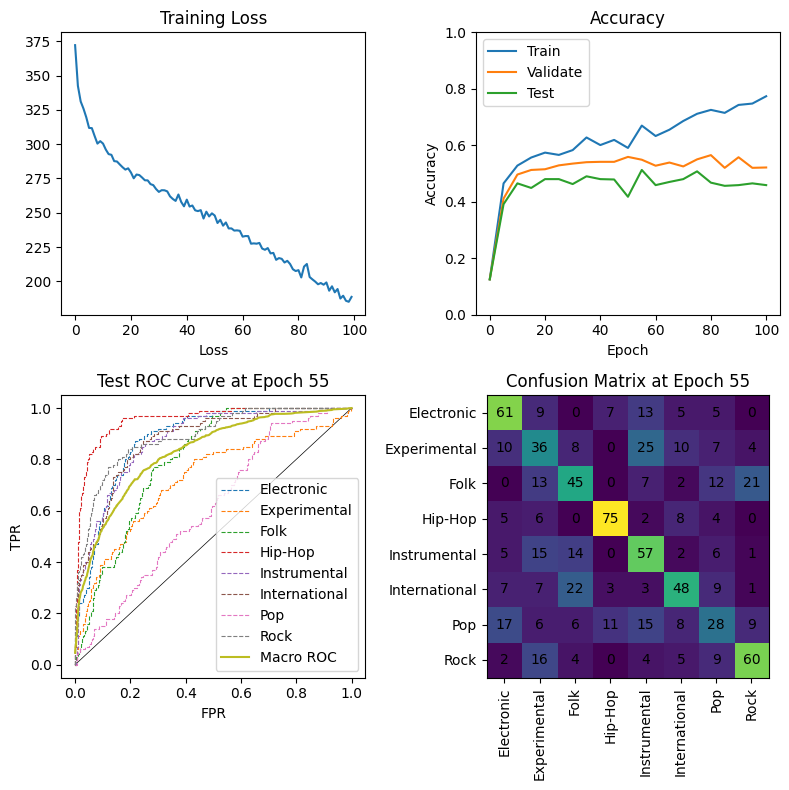

In [7]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=100, cuda=True)
ma.evaluate_pths()
ma.make_plots()